# Assignment #3 - Neural Networks

### <font color="red"> DUE: Mar 17 (Friday) 11:00 pm </font>  

<font color="blue"> Claire Ardern </font>

# I. Overview

In this assignment, we will be creating a function for k-fold cross validation to implement with neural networks. First, we will create this k-fold cross validation function and implement it using the provided neural network class for nolinear regression. Then, we will create a nonlinear logistic regression class that will allow us to implement the k-fold cross validation with the neural network class for classification. For both regression and classification, we will be using the datasets from previous assignments. 

# II. Data

We will start by providing a quick overview of each of the datasets to understand the type of information we are working with as well as to confirm that all requirements are met. Then, we will take a closer look at each dataset, visualizing the features in several ways in order to identify any cleaning tasks needed for the preprocessing of the datasets. Lastly, we will perform any necessary preprocessing on either dataset.

## II.1. Data Introduction

For regression, the selected dataset, HousePrices.csv, contains data pertaining to housing prices. There are a total of 11 input features: 
- Posted By (who listed the property)
- Under Construction
- RERA Approved
- Number of Rooms
- Type of Property 
- Area in Square Feet 
- Ready to Move
- Resale
- Address
- Longitude 
- Latitude 

The target (output) represents the price of the house. This dataset contains 29,451 samples. The reason this dataset was selected for regression is because while the features include data of several different types, the target variable is represented as some real number. There is not a specific number of output options and therefore this cannot be a classification problem. This dataset was found on Kaggle. Link: https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge?select=train.csv

For classification, the selected dataset, HotelReservations.csv, contains data pertaining to customer reservations at a hotel. There are a total of 18 input features: 
- Booking ID
- Number of Adults 
- Number of Children 
- Number of Week Nights 
- Number of Weekend Nights
- Type of Meal Plan
- Required Car Parking
- Room Type 
- Lead Time
- Arrival Year
- Arrival Month
- Arrival Date
- Market Segment Type
- Repeated Guest
- Number of Previous Cancellations
- Number of Previous Uncancelled Bookings
- Average Price per Room
- Number of Special Requests

The target (output) represents whether the reservation was cancelled. This dataset contains 36,275 samples. The reason this dataset was selected for classification is becuase while the features include numeric, integer, and string values, the target variable is represented as a class. The two output options include "Cancelled" or "Not Cancelled" which are two individual categories that can be determined by the provided features. This dataset was found on Kaggle. Link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?resource=download 


## II.2. Visualization & Observation

The first step is to load in the datasets. From there, we can vizualize the data in order to make observations. These observations will allow us to make important decisions in the process of creating a machine learning model. To do this, we have to import certain Python libraries.

In [1]:
# Import the Python libraries needed for loading, preparation, and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## II.2.1. Regression

Lets start with the dataset selected for Regression. First, we have to load in the dataset. Once this is done, we can use the simple display command to get a first look at the dataset. This will also confirm whether the dataset has been loaded in Jupyter Notebook correctly.

In [2]:
# Read in the data file.
house_df = pd.read_csv('./HousePrices.csv')

# Display data file to get a first look.
display(house_df)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


We can see a small portion of the data here. However, the majority of the rows cannot be seen and several of the feature columns are not visible without scrolling. If we want to see all of our features at once, we can print a list of the feature names.

In [3]:
# Select and print feature names from the dataset.
feature_names = house_df.columns
print(f'The feature names are:\n{feature_names.values}')

The feature names are:
['POSTED_BY' 'UNDER_CONSTRUCTION' 'RERA' 'BHK_NO.' 'BHK_OR_RK' 'SQUARE_FT'
 'READY_TO_MOVE' 'RESALE' 'ADDRESS' 'LONGITUDE' 'LATITUDE'
 'TARGET(PRICE_IN_LACS)']


It is very important to be aware of all of the features that are included in the dataset. This is the information that will be given to the computer so that it can determine the patterns and correlations between classes. Understanding which information is included as well as what this information means in relation to our classes is incredibly important for the machine learning process. While the computer sees this information only as collections of numbers, we are trying to find the hidden meanings within these collections of numbers. If we do not understand the data that determines the class, we will not be able to make any helpful inferences from our machine learning model and its results. Thankfully, in this case, the features are all self-explanatory.

So, let's take a deeper look into our dataset. What else can we learn from our data before applying it to an algorithm?

In [4]:
df_shape = house_df.shape
print(f'The dataset shape is: {df_shape}')

The dataset shape is: (29451, 12)


It looks like we have 29451 data samples and 12 features based on the shape output given above, although one of the included features will be our target. For our case, 29451 data samples is a good amount. There is enough data included to effectively train our machine learning model but not too much data that we overwhelm our computational resources.

To get a closer look at exactly which data types we are dealing with, let's print the data type for each feature.

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


It looks like the majority of our datatypes are integers and floats. This is desirable for our purposes. However, there are a few features that are listed with a dtype of "object." This means that the data included under these features are represented as strings. When cleaning up the data, these strings would be converted to integer representations in order to allow for computational actions between the columns during the training process.

We can also see that there are no null values within our dataset. This means there are no missing entries in any of our feature columns or our target column. This is desirable as we will not have to replace any null values during the data cleaning process.

Next, we can take another look at our dataset to confirm that we have made the correct inferences about the dataset shape, features, and data types. We can look at the first n rows of our dataset with .head(n) and the last n rows of our dataset with .tail(n) where we can specify a value for n.

In [6]:
house_df.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [7]:
house_df.tail(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29441,Owner,0,0,3,BHK,1500.375094,1,1,"Sector 57 Faridabad,Faridabad",28.320000,77.289381,40.0
29442,Dealer,0,0,3,BHK,1554.968123,1,1,"Sector-10A Airoli,Lalitpur",28.444490,77.004317,200.0
29443,Dealer,0,1,3,BHK,1161.194975,1,1,"Marol,Maharashtra",19.111438,72.878724,220.0
29444,Dealer,1,1,1,BHK,752.049334,0,1,"Mulund (West),Mumbai",19.175900,72.952200,100.0
29445,Owner,0,0,2,BHK,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


Here we can confirm that most of our data is represented as integers or floats while some of the data is represented as strings. We already know that we need to convert the strings to integer representations. Before we do that, let's take a closer look at the data included in those columns.

In [8]:
postedby_counts = house_df['POSTED_BY'].value_counts()
display(postedby_counts)

BHKorRK_counts = house_df['BHK_OR_RK'].value_counts()
display(BHKorRK_counts)

address_counts = house_df['ADDRESS'].value_counts()
display(address_counts)

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad         215
Sector-137 Noida,Noida                139
New Town,Kolkata                      131
                                     ... 
Ambika Township,Jivarajpark,Rajkot      1
Cheranalloor,Kochi                      1
Baba Nagar,Bangalore                    1
Barra Devi Naubasta road,Kanpur         1
E3-108, Lake View Recidency,,Vapi       1
Name: ADDRESS, Length: 6899, dtype: int64

We can also visualize this data distribution in a bar graph to make it more readable. We won't include the address feature in these plots since we know that the majority of entries will have different addresses.

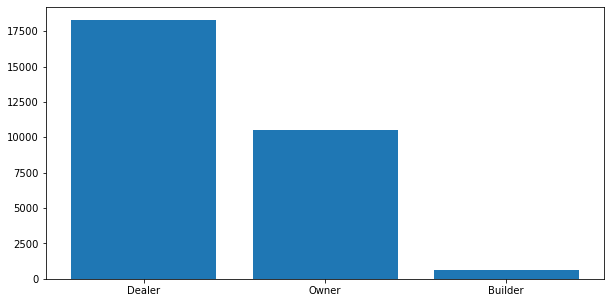

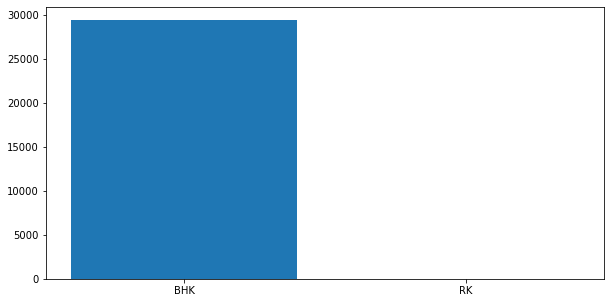

In [9]:
# Resize the figure window to ensure that all axis labels can be read.
plt.rcParams["figure.figsize"] = (10,5)

plt.bar(postedby_counts.index, postedby_counts.values)
plt.show()

plt.bar(BHKorRK_counts.index, BHKorRK_counts.values)
plt.show()

We can clearly see that the most popular poster is a dealer, though it is not clear why this is the case by simply looking at the bar graph. To answer this question requires additional information that is not included in our dataset. This additional information may also reveal a connection - if there is one - between the poster and the house price. The same can be said about the BHK or RK feature. BHK is clearly the most popular, though we cannot determine why that is from the information that is seen in the bar graph. There may be some underlying connection between BHK and the house price. This is the kind of information we are looking for when dealing with machine learning.

We already know we need to replace the string type data in these columns with integer representations. Let's double check that there are no null values that also need to be replaced before we do that.

In [10]:
house_isnull = house_df.isnull()
display(house_isnull)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,False,False,False,False,False,False,False,False,False,False,False,False
29447,False,False,False,False,False,False,False,False,False,False,False,False
29448,False,False,False,False,False,False,False,False,False,False,False,False
29449,False,False,False,False,False,False,False,False,False,False,False,False


This is one way to check for null values. However, the entire dataset cannot be seen and scrolling is necessary to see all of the columns. There is an easier way to check for null values using .any()

In [11]:
househasnull = np.any(house_isnull)
print(f"Value of househasnull is: {househasnull}")

Value of househasnull is: False


We can now clearly see that there are no null values within the dataset. This means we will not have to replace any null values when cleaning up the data.

Now, lets take a closer look at the numerical features. We want to ensure that our numerical features do not have drastically different scales. If one input feature has much larger values than another input feature, the machine learning model will assign larger weights to this feature which is not desirable.

In [12]:
house_describe = house_df.describe()
display(house_describe)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


Here we can see the mean and standard deviation of each feature (along with additional information). This will reveal whether any scaling is necessary. According to the provided tutorial, if we have a large mean and comparably large standard deviation this is acceptable but if we have a small mean and a very large standard deviation this can cause trouble for learning as our values for that feature will vary drastically.

None of the mean and standard deviations for any one feature stand out as troublesome. However, the target (price_in_lacs) does have a standard deviation that is larger than the mean. Since this is our target feature it should not cause any problems. This should not need to be resolved in order to apply a machine learning algorithm.

The last visualization and exploration step to perform here is an observation of the correlations between the features.
We can easily plot each feature against every other feature to see if there are any trends between features.

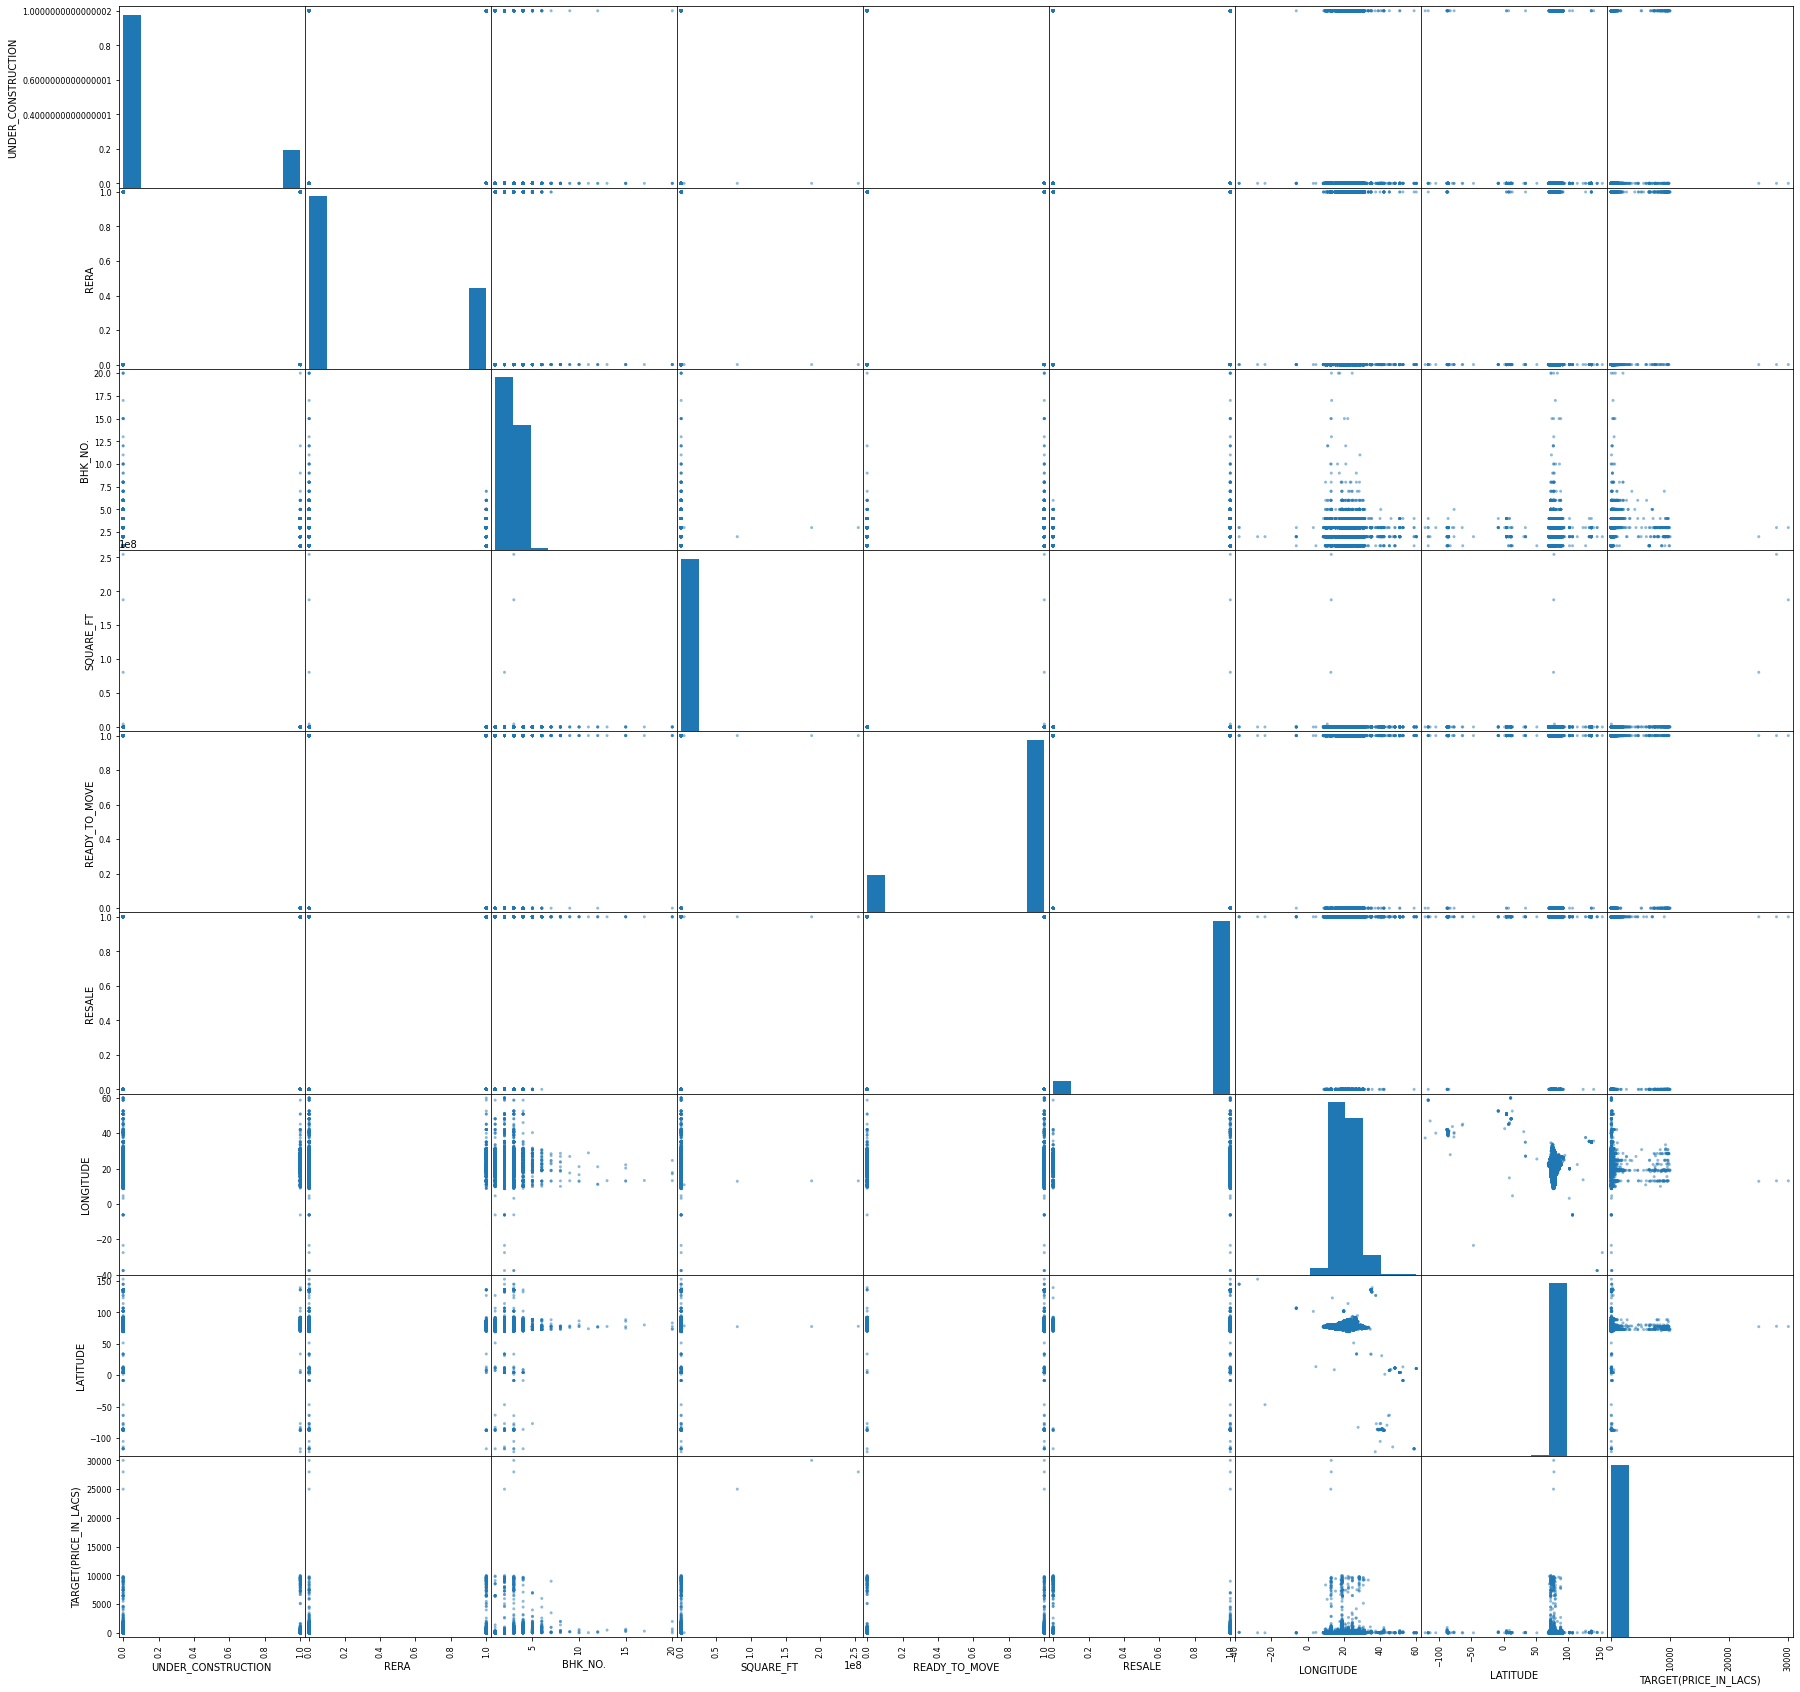

In [13]:
pd.plotting.scatter_matrix(house_df, figsize=(30, 30))
plt.show()

This plot is fairly complex and hard to interpret. It is difficult to determine any relationships between the features here. Another possibility is to plot each feature against the target. This may reveal any trends or correlations that can be useful when applying the machine learning model.

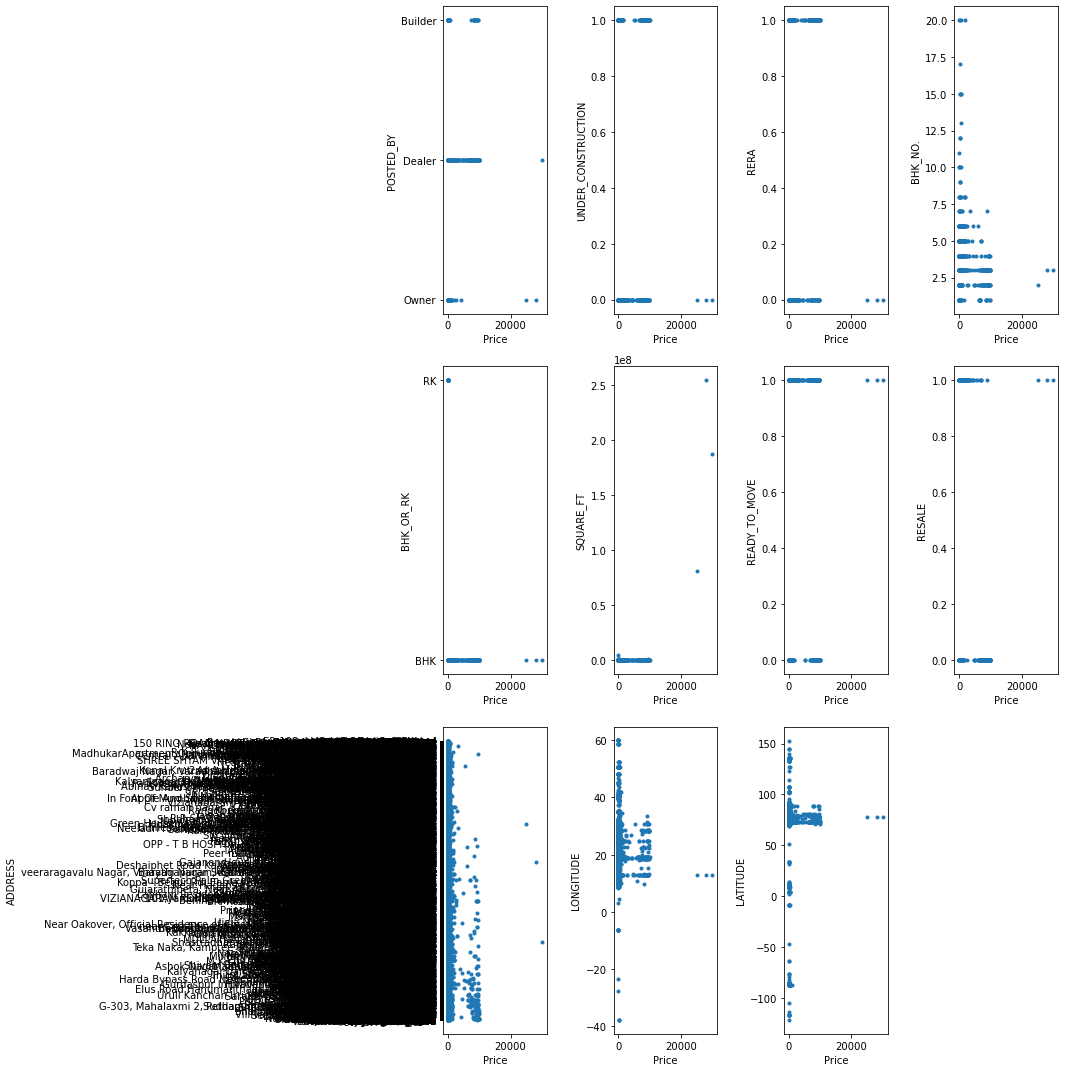

In [14]:
X = house_df.iloc[:, :-1]
y = house_df['TARGET(PRICE_IN_LACS)']

fig, _ = plt.subplots(figsize=(15, 15))
for idx, column_name in enumerate(X.columns.values):
    # print(idx, column_name)
    plt.subplot(3, 4, idx+1)
    plt.plot(y, X[column_name], '.')
    plt.ylabel(column_name)
    plt.xlabel('Price')
fig.tight_layout()

It is still hard to see any correlations between the features and the label here. Because there are so many unique entries in the address column, the plots here become cluttered. We can get a better idea of which features may correlate by computing the correlation score between feature pairs. The corr function makes this simple.

In [15]:
corr_matrix = house_df.corr()
corr_matrix

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


There does not seem to be much correlation between features here. Only the resale, ready_to_move, and RERA features seem to show any real level of correlation. This may indicate that the effective application of a machine learning model could be difficult.

Now that we have completed the data exploration, let's recap what we discovered. First, we noted that any data is a string format will need to be converted to an integer representation in order to make computations within the machine learning process possible. We also noted that our features may need to be scaled as the ranges differ greatly between numerical features. Thankfully, there were no other cleaning chores that were needed for this dataset.

## II.2.2. Classification

Now let's follow the same process with the dataset selected for Classification. First, we have to load in the dataset. Once this is done, we can use the simple display command to get a first look at the dataset. This will also confirm whether the dataset has been loaded in Jupyter Notebook correctly.

In [16]:
# Read in the data file.
hotel_df = pd.read_csv('./HotelReservations.csv')

# Display data file to get a first look.
display(hotel_df)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


We can see a small portion of the data here. However, the majority of the rows cannot be seen and several of the feature columns are not visible without scrolling. If we want to see all of our features at once, we can print a list of the feature names.

In [17]:
# Select and print feature names from the dataset.
feature_names = hotel_df.columns
print(f'The feature names are:\n{feature_names.values}')

The feature names are:
['Booking_ID' 'no_of_adults' 'no_of_children' 'no_of_weekend_nights'
 'no_of_week_nights' 'type_of_meal_plan' 'required_car_parking_space'
 'room_type_reserved' 'lead_time' 'arrival_year' 'arrival_month'
 'arrival_date' 'market_segment_type' 'repeated_guest'
 'no_of_previous_cancellations' 'no_of_previous_bookings_not_canceled'
 'avg_price_per_room' 'no_of_special_requests' 'booking_status']


It is very important to be aware of all of the features that are included in the dataset. This is the information that will be given to the computer so that it can determine the patterns and correlations between classes. Understanding which information is included as well as what this information means in relation to our classes is incredibly important for the machine learning process. While the computer sees this information only as collections of numbers, we are trying to find the hidden meanings within these collections of numbers. If we do not understand the data that determines the class, we will not be able to make any helpful inferences from our machine learning model and its results. Thankfully, in this case, the features are all self-explanatory.

So, let's take a deeper look into our dataset. What else can we learn from our data before applying it to an algorithm?

In [18]:
df_shape = hotel_df.shape
print(f'The dataset shape is: {df_shape}')

The dataset shape is: (36275, 19)


It looks like we have 36275 data samples and 19 features based on the shape output given above, although one of the included features will be our target. For our case, 36275 data samples is a good amount. There is enough data included to effectively train our machine learning model but not too much data that we overwhelm our computational resources.

To get a closer look at exactly which data types we are dealing with, let's print the data type for each feature.

In [19]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

It looks like the majority of our datatypes are integers and floats. This is desirable for our purposes. However, there are a few features that are listed with a dtype of "object." This means that the data included under these features are represented as strings. When cleaning up the data, these strings would be converted to integer representations in order to allow for computational actions between the columns during the training process.

We can also see that there are no null values within our dataset. This means there are no missing entries in any of our feature columns or our target column. This is desirable as we will not have to replace any null values during the data cleaning process.

Next, we can take another look at our dataset to confirm that we have made the correct inferences about the dataset shape, features, and data types. We can look at the first n rows of our dataset with .head(n) and the last n rows of our dataset with .tail(n) where we can specify a value for n.

In [20]:
hotel_df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [21]:
hotel_df.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


Here we can confirm that most of our data is represented as integers or floats while some of the data is represented as strings. We already know that we need to convert the strings to integer representations. Before we do that, let's take a closer look at the data included in those columns.

In [22]:
mealplan_counts = hotel_df['type_of_meal_plan'].value_counts()
display(mealplan_counts)

roomtype_counts = hotel_df['room_type_reserved'].value_counts()
display(roomtype_counts)

booking_counts = hotel_df['booking_status'].value_counts()
display(booking_counts)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

We can also visualize this data distribution in a bar graph to make it more readable. 

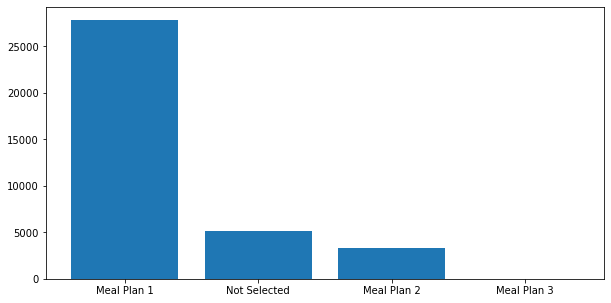

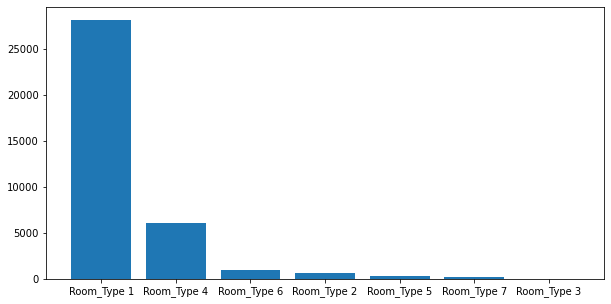

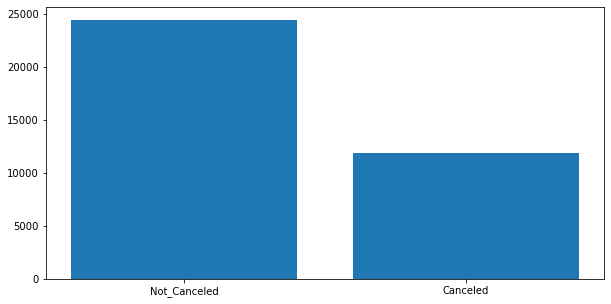

In [23]:
# Resize the figure window to ensure that all axis labels can be read.
plt.rcParams["figure.figsize"] = (10,5)

plt.bar(mealplan_counts.index, mealplan_counts.values)
plt.show()

plt.bar(roomtype_counts.index, roomtype_counts.values)
plt.show()

plt.bar(booking_counts.index, booking_counts.values)
plt.show()

We can clearly see that the most popular meal plan is Meal Plan 1, though it is not clear why this is the case by simply looking at the bar graph. To answer this question requires additional information that is not included in our dataset. This additional information may also reveal a connection - if there is one - between the selected meal plan and a cancellation. The same can be said about the room type. Room Type 1 is clearly the most popular, though we cannot determine why that is from the information that is seen in the bar graph. There may be some underlying connection between the type of room and a cancellation. This is the kind of information we are looking for when dealing with machine learning.

The last bar graph shows our target. This is the information we want to predict when creating our model. We can see that hotel reservations are not cancelled as often as they are held. Finding the patterns within our input features will reveal why some of the reservations are cancelled. 

We already know we need to replace the string type data in these columns with integer representations. Let's double check that there are no null values that also need to be replaced before we do that.

In [24]:
hotel_isnull = hotel_df.isnull()
display(hotel_isnull)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36271,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


This is one way to check for null values. However, the entire dataset cannot be seen and scrolling is necessary to see all of the columns. There is an easier way to check for null values using .any()

In [25]:
hotelhasnull = np.any(hotel_isnull)
print(f"Value of hotelhasnull is: {hotelhasnull}")

Value of hotelhasnull is: False


We can now clearly see that there are no null values within the dataset. This means we will not have to replace any null values when cleaning up the data. 

Now, lets take a closer look at the numerical features. We want to ensure that our numerical features do not have drastically different scales. If one input feature has much larger values than another input feature, the machine learning model will assign larger weights to this feature which is not desirable.

In [26]:
hotel_describe = hotel_df.describe()
display(hotel_describe)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Here we can see the mean and standard deviation of each feature (along with additional information). This will reveal whether any scaling is necessary. According to the provided tutorial, if we have a large mean and comparably large standard deviation this is acceptable but if we have a small mean and a very large standard deviation this can cause trouble for learning as our values for that feature will vary drastically. 

None of the mean and standard deviations for any one feature stand out as troublesome. However, no_of_previous_bookings_not_canceled does have a standard deviation that is larger than the mean. We will keep an eye on this feature and investigate further. Let's start by displaying the column.

In [27]:
prevbook_values = hotel_df['no_of_previous_bookings_not_canceled']
display(prevbook_values)

0        0
1        0
2        0
3        0
4        0
        ..
36270    0
36271    0
36272    0
36273    0
36274    0
Name: no_of_previous_bookings_not_canceled, Length: 36275, dtype: int64

From the quick printout of the column we can already see lots of zero values. Let's take a closer look by using a bar graph.

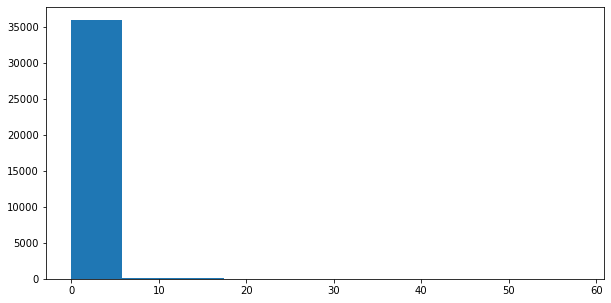

In [28]:
plt.hist(prevbook_values)
plt.show()

It looks like majority of our values are located near zero. This explains the small mean with a larger standard deviation.

We can also take a more quantifiable approach by counting how many times each value appears.

In [29]:
prevbook_value_count = prevbook_values.value_counts()
display(prevbook_value_count)

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

We can see that the vast majority of samples in this column have a value of 0. There are many more values close to 0. Our data is clearly skewed. This may or may not cause problems depending on the machine learning model. Thankfully, this is a simple issue to resolve by taking the log of the data in this column.

In [30]:
log_prevbook_values = prevbook_values.apply(lambda x: np.log(x+1))
log_prevbook_values

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
36270    0.0
36271    0.0
36272    0.0
36273    0.0
36274    0.0
Name: no_of_previous_bookings_not_canceled, Length: 36275, dtype: float64

Now let's graph the result.

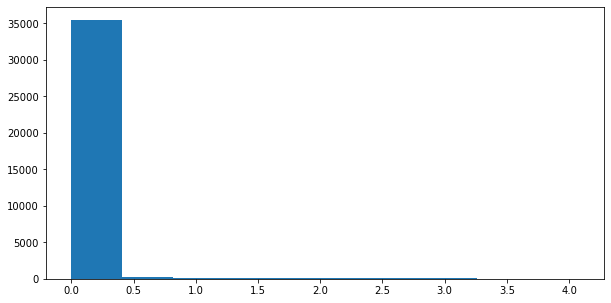

In [31]:
plt.hist(log_prevbook_values)
plt.show()

We can see our value range is now smaller and the differences in values is much more clear. However, the data is still clearly skewed.

If we take a look at the mean and standard deviation we can see the standard deviation is way more in line with the mean now.

In [32]:
log_prevbook_values.describe()

count    36275.000000
mean         0.036182
std          0.271920
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.077537
Name: no_of_previous_bookings_not_canceled, dtype: float64

The last visualization and exploration step to perform here is an observation of the correlations between the features.

We can easily plot each feature against every other feature to see if there are any trends between features.

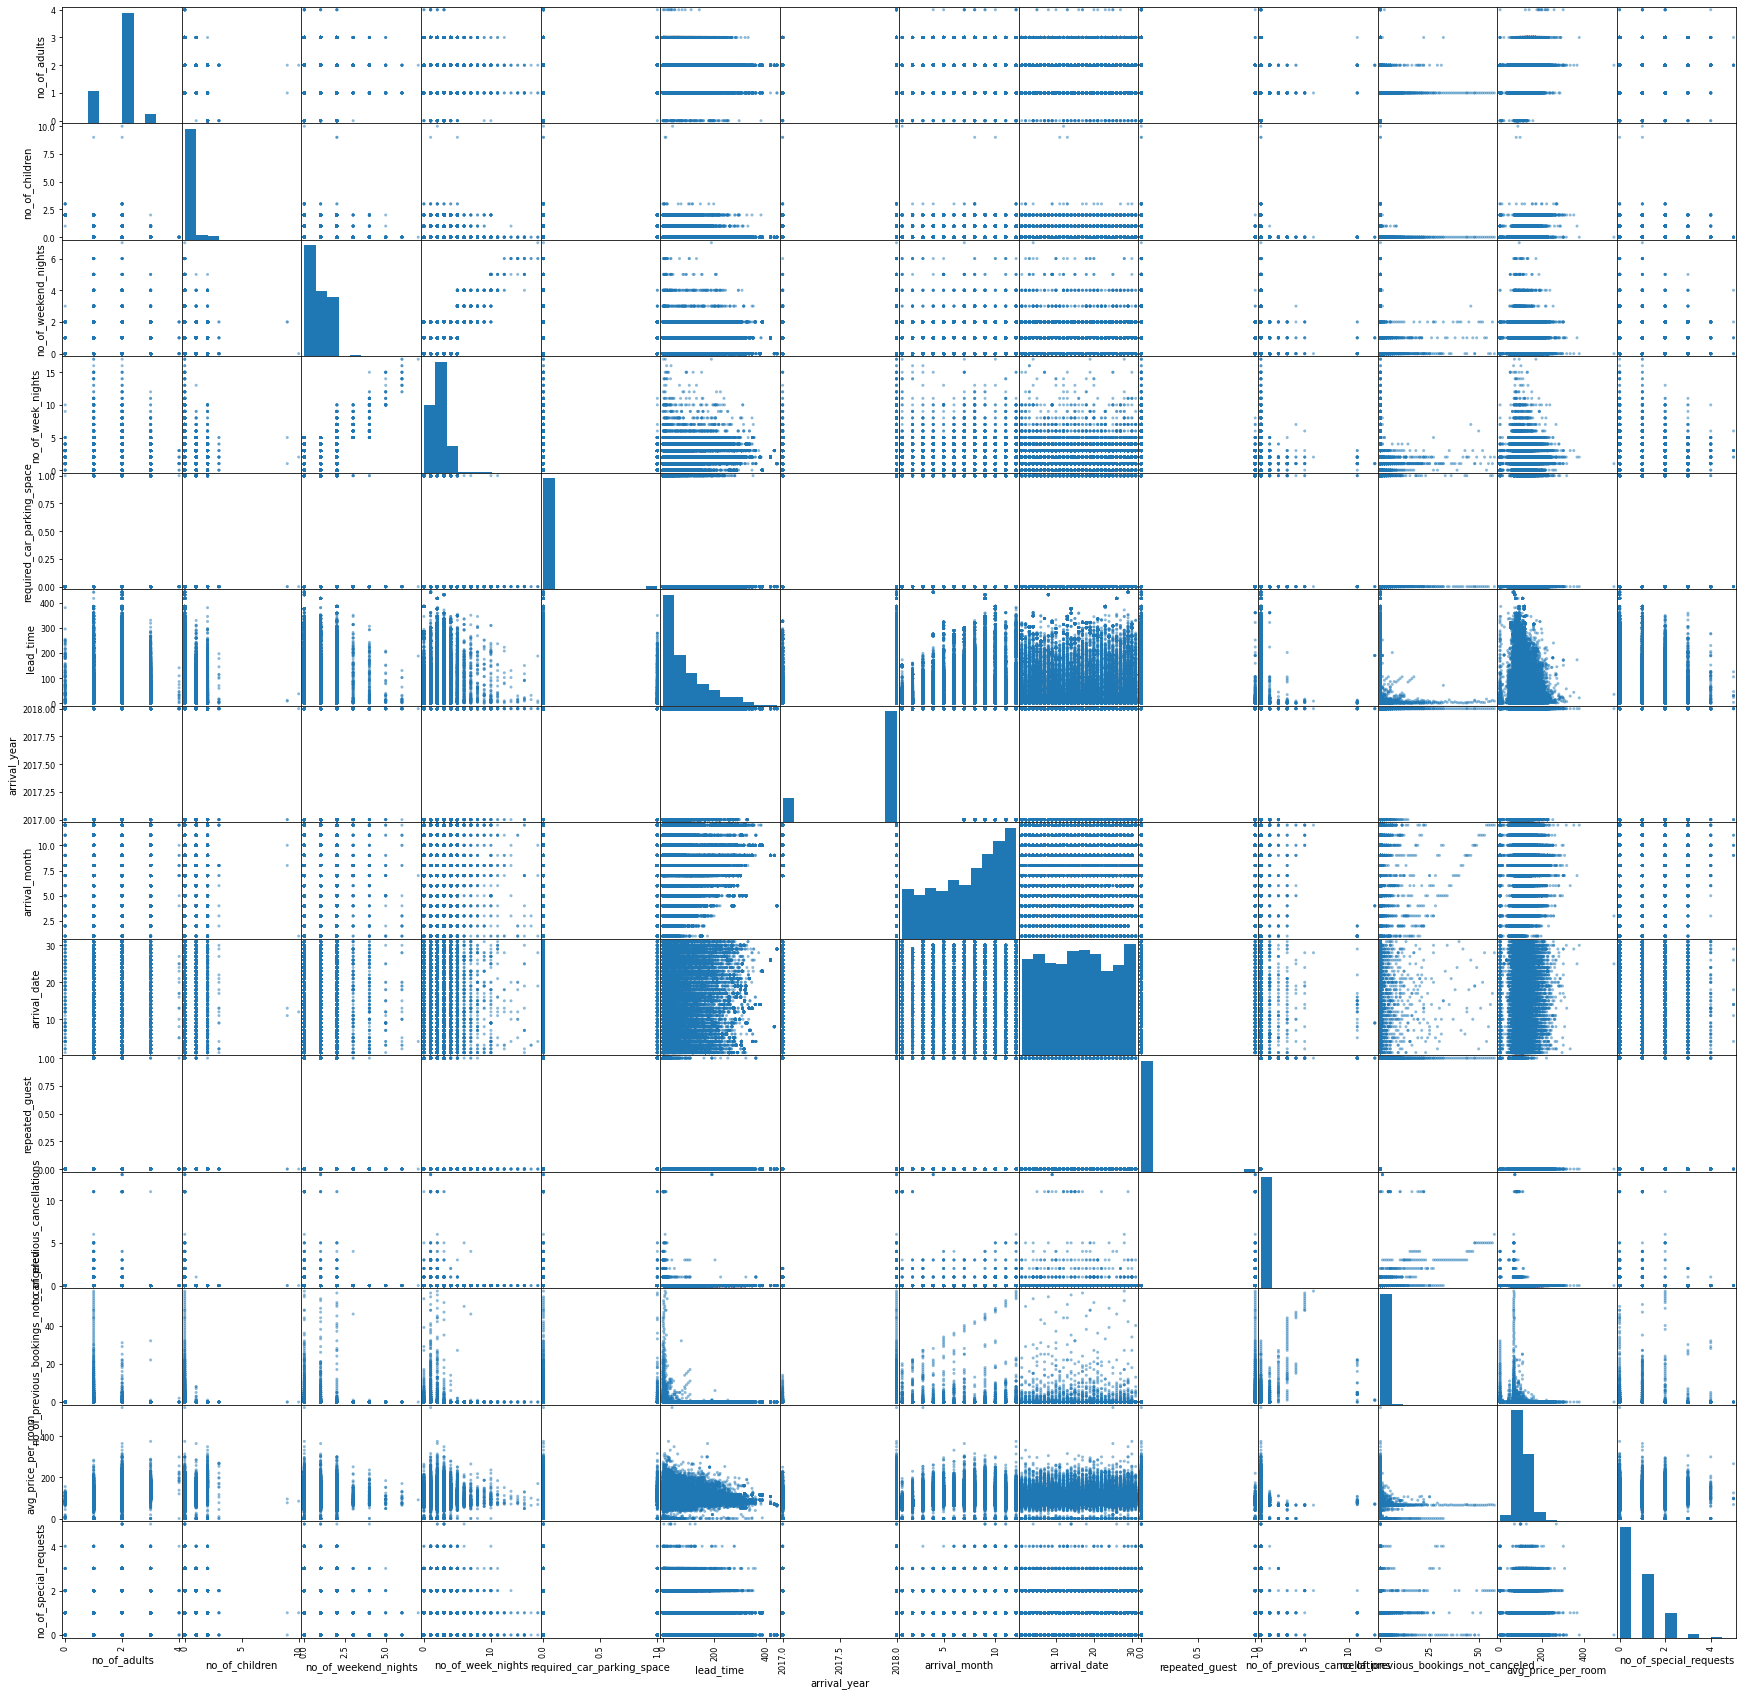

In [33]:
pd.plotting.scatter_matrix(hotel_df, figsize=(30, 30))
plt.show()

This plot is fairly complex and hard to interpret. It is difficult to determine any relationships between the features here. Another possibility is to plot each feature against the target. This may reveal any trends or correlations that can be useful when applying the machine learning model.

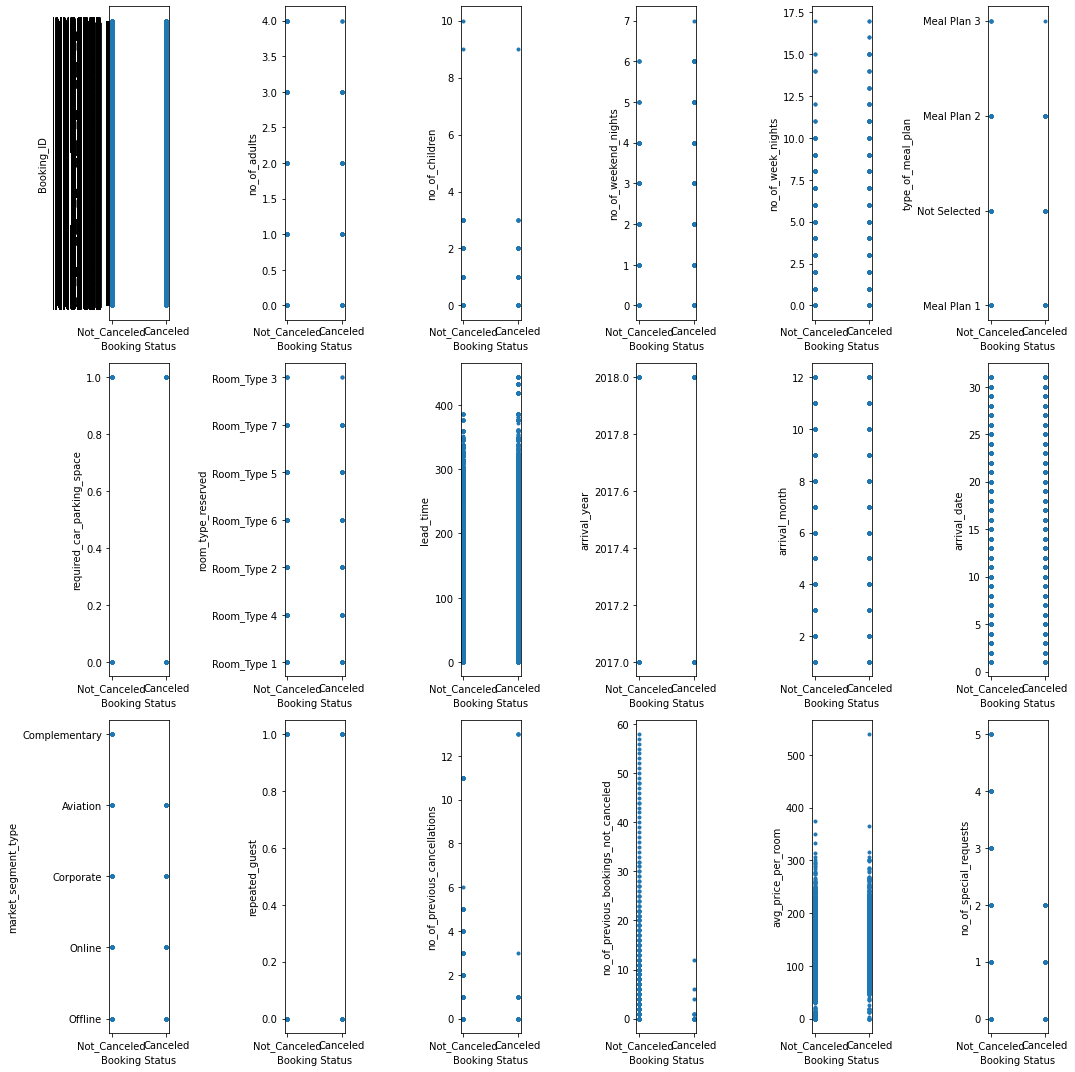

In [34]:
X = hotel_df.iloc[:, :-1]
y = hotel_df['booking_status']

fig, _ = plt.subplots(figsize=(15, 15))
for idx, column_name in enumerate(X.columns.values):
    # print(idx, column_name)
    plt.subplot(3, 6, idx+1)
    plt.plot(y, X[column_name], '.')
    plt.ylabel(column_name)
    plt.xlabel('Booking Status')
fig.tight_layout()

It is still hard to see any correlations between the features and the label here. We can get a better idea of which features may correlate by computing the correlation score between feature pairs. The corr function makes this simple.

In [35]:
corr_matrix = hotel_df.corr()
corr_matrix

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


There does not seem to be much correlation between features here. Only the repeated_guest, no_of_previous_cancellations, and no_of_previous_bookings_not_canceled seem to show any real level of correlation. This may indicate that the effective application of a machine learning model could be difficult.

Now that we have completed the data exploration, let's recap what we discovered. First, we noted that any data is a string format will need to be converted to an integer representation in order to make computations within the machine learning process possible. We also noted that our features may need to be scaled as the ranges differ greatly between numerical features. Lastly, we want to take the log of any features that are skewed towards 0.

# II.3 Cleaning

Now that we have explored both of our datasets its time to perform any necessary preprocessing. Any tasks that need to be completed in this section were identified while exploring the data in the previous section. In order to begin cleaning we need to import some libraries.

In [36]:
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# II.3.1 Regression

First, lets clean the regression dataset. During our exploration and visualization of this dataset, we discovered two different cleaning tasks to perform:

- Convert string data to integer representation
- Scale data

Start with the string data. The provided tutorial recommends the use of one-hot encodings to resolve this issue. There are several ways we can go about creating one-hot encodings. When using Pandas, the easiest way is to simply call the get_dummies() function and pass forestfire_df to it to convert all the categorical features to one-hot encodings.

In [37]:
one_hot_df = pd.get_dummies(house_df)
display(one_hot_df)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,...,"ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vikas nagar,Karnal","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,0,...,0,0,0,0,0,0,0,0,0,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,0,...,0,0,0,0,0,0,0,0,0,0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,0,...,0,0,0,0,0,0,0,0,0,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
one_hot_df_shape = one_hot_df.shape
print(f"Shape of one_hot_df is: {one_hot_df_shape}")

Shape of one_hot_df is: (29451, 6913)


You should see that we now have over 6500 features! The one-hot encoding has split the feature columns. Since there are so many different string values in the address column, this method may not be the best for this specific case. We can try applying the one-hot encoding to all other string type columns besides "address." When applying a machine learning model, we would likely remove this column anyways.

If we want this one-hot encoding to work with our Sklearn pipeline we need to create a wrapper class. Below we do so by inheriting from BaseEstimator and TransformerMixin and defining the fit() and transform() methods.

In [39]:
class OneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = None
    
    def fit(self, X: pd.DataFrame, y: pd.DataFrame = None):
        # We don't need to set/learn any variables so
        # we just need to return a reference to the object with 'self'
        return self
    
    def transform(self, X: pd.DataFrame, y: pd.DataFrame = None):
        one_hot = pd.get_dummies(X)
        self.feature_names = one_hot.columns
        
        return one_hot

In [40]:
one_hot = OneHotEncoding()
ohe_df = one_hot.fit_transform(house_df[['POSTED_BY', 'BHK_OR_RK']])
display(ohe_df)

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK
0,0,0,1,1,0
1,0,1,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,1,0,1,0
...,...,...,...,...,...
29446,0,0,1,1,0
29447,0,0,1,1,0
29448,0,1,0,1,0
29449,0,0,1,1,0


To practice the pipeline feature, lets practice building a simple pipeline here. Doing this will convert the dataframe to a numpy array. We will have to reverse this process afterwards.

In [41]:
stages = [
    ('one_hot',  OneHotEncoding(), ['POSTED_BY', 'BHK_OR_RK']),
]

before_pipe = ColumnTransformer(stages, remainder='passthrough',)

In [42]:
clean_array = before_pipe.fit_transform(house_df)
clean_array

array([[0, 0, 1, ..., 12.96991, 77.59796, 55.0],
       [0, 1, 0, ..., 12.274538, 76.644605, 51.0],
       [0, 0, 1, ..., 12.778033, 77.632191, 43.0],
       ...,
       [0, 1, 0, ..., 26.928785, 75.828002, 27.1],
       [0, 0, 1, ..., 12.90015, 80.22791, 67.0],
       [0, 1, 0, ..., 26.832353, 75.841749, 27.8]], dtype=object)

Now let's convert back to a dataframe.

In [43]:
cat_feature_names = before_pipe.transformers_[0][1].feature_names
cat_feature_names

Index(['POSTED_BY_Builder', 'POSTED_BY_Dealer', 'POSTED_BY_Owner',
       'BHK_OR_RK_BHK', 'BHK_OR_RK_RK'],
      dtype='object')

In [44]:
old_feature_names = house_df.drop(['TARGET(PRICE_IN_LACS)', 'POSTED_BY', 'BHK_OR_RK'], axis=1).columns
old_feature_names

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

In [45]:
new_feature_names = list(cat_feature_names) + list(old_feature_names) + ['TARGET(PRICE_IN_LACS)']
new_feature_names

['POSTED_BY_Builder',
 'POSTED_BY_Dealer',
 'POSTED_BY_Owner',
 'BHK_OR_RK_BHK',
 'BHK_OR_RK_RK',
 'UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'SQUARE_FT',
 'READY_TO_MOVE',
 'RESALE',
 'ADDRESS',
 'LONGITUDE',
 'LATITUDE',
 'TARGET(PRICE_IN_LACS)']

In [46]:
clean_house_df = pd.DataFrame(clean_array, columns=new_feature_names)
clean_house_df

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,1,1,0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.96991,77.59796,55.0
1,0,1,0,1,0,0,0,2,1275.0,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,0,0,1,1,0,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,0,0,1,1,0,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.6423,77.3445,62.5
4,0,1,0,1,0,1,0,2,999.009247,0,1,"New Town,Kolkata",22.5922,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,1,1,0,0,0,3,2500.0,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,0,0,1,1,0,0,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,0,1,0,1,0,0,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,0,0,1,1,0,0,0,2,927.079009,1,1,"Sholinganallur,Chennai",12.90015,80.22791,67.0


With the string values taken care of, our next task is to scale the data. To do this, we must first split the dataset into X and Y subsets. For this reason, we will leave the standardization for later. We can do this within our methods.

We have now completed all of the cleaning tasks that were found to be necessary for this dataset.

# II.3.2 Classification

Now lets clean the classification dataset. During our exploration and visualization of this dataset, we discovered three different cleaning tasks to perform:

- Convert string data to integer representation
- Scale data
- Take the log of data skewed toward 0

Start with the string data. The provided tutorial recommends the use of one-hot encodings to resolve this issue. There are several ways we can go about creating one-hot encodings. When using Pandas, the easiest way is to simply call the get_dummies() function and pass forestfire_df to it to convert all the categorical features to one-hot encodings.

In [47]:
one_hot_df = pd.get_dummies(hotel_df)
display(one_hot_df)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,1,0,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,1,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,1,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,0,0,0,0,0,0,1,0,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,1,1,0
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,1,0,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,1,1,0


In [48]:
one_hot_df_shape = one_hot_df.shape
print(f"Shape of one_hot_df is: {one_hot_df_shape}")

Shape of one_hot_df is: (36275, 36307)


You should see that we now have over 35000 features! The one-hot encoding has split the feature columns.

If we want this one-hot encoding to work with our Sklearn pipeline we need to create a wrapper class.

In [49]:
one_hot = OneHotEncoding()
ohe_df = one_hot.fit_transform(hotel_df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']])
display(ohe_df)

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
36271,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
36272,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
36273,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0


With the string values taken care of, our next task is to take the log of any columns that are skewed towards 0. We already did this when exploring the data but we can do it again for practice. Let's use the class provided in the tutorial this time.

In [50]:
class LogTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return np.log(X+1)

In [51]:
log = LogTransformer()
log_prevbook_df = log.fit_transform(hotel_df['no_of_previous_bookings_not_canceled'])
display(log_prevbook_df)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
36270    0.0
36271    0.0
36272    0.0
36273    0.0
36274    0.0
Name: no_of_previous_bookings_not_canceled, Length: 36275, dtype: float64

If the class is correct, we should get the same histogram as before.

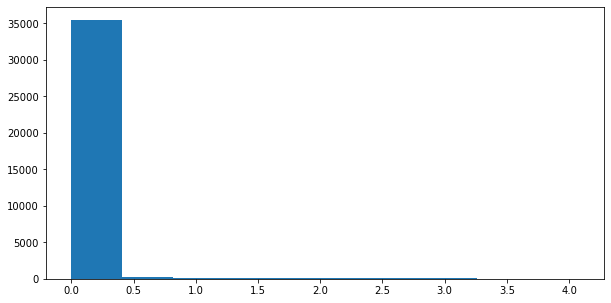

In [52]:
plt.hist(log_prevbook_df)
plt.show()

Looks great! Let's add both of the cleaning tasks we've done so far to a pipeline for more practice.

In [53]:
stages = [
    ('one_hot',  OneHotEncoding(), ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']),
    ('log', LogTransformer(), ['no_of_previous_bookings_not_canceled']),
]

before_pipe = ColumnTransformer(stages, remainder='passthrough',)

In [54]:
clean_array = before_pipe.fit_transform(hotel_df)
clean_array

array([[1, 0, 0, ..., 65.0, 0, 'Not_Canceled'],
       [0, 0, 0, ..., 106.68, 1, 'Not_Canceled'],
       [1, 0, 0, ..., 60.0, 0, 'Canceled'],
       ...,
       [1, 0, 0, ..., 98.39, 2, 'Not_Canceled'],
       [0, 0, 0, ..., 94.5, 0, 'Canceled'],
       [1, 0, 0, ..., 161.67, 0, 'Not_Canceled']], dtype=object)

Now we have to convert the array back to a dataframe like we did in the previous section on Regression.

In [55]:
cat_feature_names = before_pipe.transformers_[0][1].feature_names
cat_feature_names

Index(['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [56]:
old_feature_names = hotel_df.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], axis=1).columns
old_feature_names

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [57]:
new_feature_names = list(cat_feature_names) + ['booking_status'] + list(old_feature_names)
new_feature_names

['type_of_meal_plan_Meal Plan 1',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Meal Plan 3',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 1',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 3',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Aviation',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online',
 'booking_status',
 'Booking_ID',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [58]:
clean_hotel_df = pd.DataFrame(clean_array, columns=new_feature_names)
clean_hotel_df

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1,0,0,0,1,0,0,0,0,0,...,0,224,2017,10,2,0,0,65.0,0,Not_Canceled
1,0,0,0,1,1,0,0,0,0,0,...,0,5,2018,11,6,0,0,106.68,1,Not_Canceled
2,1,0,0,0,1,0,0,0,0,0,...,0,1,2018,2,28,0,0,60.0,0,Canceled
3,1,0,0,0,1,0,0,0,0,0,...,0,211,2018,5,20,0,0,100.0,0,Canceled
4,0,0,0,1,1,0,0,0,0,0,...,0,48,2018,4,11,0,0,94.5,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1,0,0,0,0,0,0,1,0,0,...,0,85,2018,8,3,0,0,167.8,1,Not_Canceled
36271,1,0,0,0,1,0,0,0,0,0,...,0,228,2018,10,17,0,0,90.95,2,Canceled
36272,1,0,0,0,1,0,0,0,0,0,...,0,148,2018,7,1,0,0,98.39,2,Not_Canceled
36273,0,0,0,1,1,0,0,0,0,0,...,0,63,2018,4,21,0,0,94.5,0,Canceled


Done! Looks much better. Now all that is left is to standardize the data. To do this, we must first split the dataset into X and Y subsets. For this reason, we will leave the standardization for later. We can do this within our methods.

We have now completed all of the cleaning tasks that were found to be necessary for this dataset!

# III. Methods

## III.A 5-fold Cross Validation

- Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies. 


### III.A.1 5-Fold Cross Validation Algorithm

K-Fold Cross Validation is a method of estimating the performance of a machine learning model. This method is performed by first splitting the complete dataset into a number of subsets called folds. For our purposes, we will be using 5 folds, so there will be five subsections of data. Then, the 5 folds are grouped into three sections: training, validation, and testing. So, from the beginning, one of these folds will be set aside for testing. Of the four remaining folds, three will be selected for training and one will be selected for validation.

NOTE: These initial selections are arbitraty, as each of the folds will eventually be used for each of the three purposes (train, validate, test). 

Once the testing, validation, and training folds have been selected, the model is trained using the training folds. After this, the model performance is evaluated using the validation fold. At this point, if desired, we can use the current folds to train several models and save the performance metrics for each to be compared at the end of the process. Then, the validation and training folds will be swapped around until every fold has been used for both training and validation. At each fold selection, the process of evaluating the model(s) is repeated. 

This entire process is also repeated from the point where the original testing fold was set aside. This process, although it may seem repetitive, will give us an accurate estimate of the performance of a model. As different data distributions and the information contained in these distributions may influence the training and accuracy of a model, the process of K-Fold Cross Validation allows us to avoid these potential negative effects of using smaller datasets. 

### III.A.2 5-Fold Cross Validation Code Implementation

The method seen below is an implementation of K-Fold Cross Validation in code. By using nested for loops, it follows the previously explained process of cycling through the folds for traning, validation, and testing. It will train the model using the neural network model, data, targets, hyperparameters, and metric function that are passed into the method. As we will be using five folds folds for each of our implementations, we set k to 5 here in the method definition. 

The neural network model that is passed in will either be the provided code for Nonlinear Regression or the altered version of this code for Nonlinear Logistic Regression. The data and targets will be the inputs and expected outputs for our dataset. The hyperparameters include the number of layers in the network, the number of nodes in the layers, and the number of outputs. 


In [93]:
from nn import NeuralNet
from sklearn.model_selection import KFold 

def kfoldCV(nn_class, X, T, hyper_parameters, metric_func, k=5):
    # Compute splits based on number of k-folds (do this for data and targets)
    # Splits is an abstract representation of BOTH the data and targets. You
    # will likely need to change, to some degree, the implementation of the splits that is given here.
    # splits = ...

    X_splits = []
    T_splits = []
    
    metrics_list = []
    params_list = []
    test_metrics_list = []
    test_params_list = []

    kf = KFold(n_splits = k) 

    for train_index, test_index in kf.split(X):
        #print('TRAIN:', train_index, 'TEST:', test_index)
        X_splits.append(train_index)
        T_splits.append(test_index)    
    
    # Loop over splits such that each split acts as a test set
    # t is the index of the current test_split, test_split contains the actual data/targets for said split. 
    for t, test_split in enumerate(T_splits):
        # Unpack data and targets from test split
        # X_test, T_test = test_split
        X_test = X[test_split]
        T_test = T[test_split]
        
        # Compute validation splits which is determined by all the data expect the current test split (do this for data and targets)
        # valid_splits = ...
        
        # Loop over validation splits such that each split acts as a validation set
        # v is the index of the current valid_split, valid_split contains the actual data/targets for said split. 
        for v, valid_split in enumerate(X_splits):
            # Unpack data and targets from valid split
            # X_valid, T_valid = valid_split
            X_valid = X[valid_split]
            T_valid = T[valid_split]
            
            # Unpack and concat all the remaining splits into one training set for data and targets.
            # You can use v and t to see which split indexes are already being used for testing and validation
            # X_train, T_train = ...
            X_train = X[X_splits[v+1]]
            T_train = T[X_splits[v+1]]
            for i in range(len(X_splits)): 
                if (i != v) and (i != (v + 1)):
                   # X_train.append(X[X_splits[i]])
                   # T_train.append(T[X_splits[i]])
                    X_train = np.vstack((X_train, X[X_splits[i]]))
                    print(X_train.shape)
                    T_train = np.hstack((T_train, T[X_splits[i]]))
                    print(T_train.shape)
                    
            print('X_train size: ', len(X_train))
            print('T_train size: ', len(T_train))  
            
            # Loop over hyper-parameters
            for nunits in hyper_parameters:
                # Initialize class instance based on whatever class we passed to nn_class
                nn = nn_class(nunits)
                # Set to false to prevent target standardization unless you really want this
                nn.stdTarget=False
                # Train using training data
                nn.train(X_train, T_train)
                # Predict using validation data
                y_preds = nn.use(X_valid)
                
                # Pass ground truth validation targets and validation predictions to the 
                # passed metric_func.
                metric = metric_func(T_valid, y_preds)

                # Store best validation metrics and parameter
                # Storing these in separate lists is easy.
                metrics_list.append(metric)
                params_list.append(nunits)
                
            # Find best parameters based on the parameters with the best validation metric
            for i in range(len(metrics_list)):
                if metrics_list[i] < metrics_list[i + 1]:
                    best_nunits = params_list[i]
                    best_metrics = metrics_list[i]
            # Concat training and validation data to be used for training
            X_train = np.concat((X_train, X_valid)) 
            T_train = np.concat((T_train, T_valid))
    
            # Train new nn model using best parameters and concated data
            nn = nn_class(best_nunits)
            nn.stdTarget=False
            nn.train(X_train, T_train, best_nunits)
            # Predict using test split data
            y_preds = nn.use(X_test)
            # Compute metric for test split predictions
            metric = metric_func(T_test, y_preds)
            # Store best test metric and parameter
            # Storing these in separate lists is easy.
            test_metrics_list.append(metric)
            test_params_list.append(best_nunits)
                
        for i in range(len(test_metrics_list)):
            if test_metrics_list[i] < test_metrics_list[i + 1]:
                best_nunits = test_params_list[i]
                best_metrics = test_metrics_list[i]
    
    # Return best test metrics and parameters
    return best_metrics, best_params


$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

## III.B Nonlinear Regression 

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes (not in comment). 

### III.B.1 Nonlinear Regression Algorithm

In general, Linear Regression is a linear method to finding the relationship between input and output data. This linear relationship is defined by the following formula:

$$
y = mx + b
$$
or 
$$
Y = X \cdot W \ \ \ \ (1)
$$

In this formula, the x values represent the input data points while the y values represent the output data points. The two remaining variables, m and b (or the matrix W), represent the slope and bias of the linear relationship. All together, this equation creates a line that will eventually define the relationship between the input and output. We can then use this line to predict the output values for new, unseen input values. 

Nonlinear Regression is built off of the concept for Linear Regression. Instead of using equation (1) to define the linear relationship between X and Y, we use equation (2) to account for the nonlinearity of the data by converting X to a nonlinear representation $\Phiv$. By doing so, we can create a nonlinear line that will eventually define the relationship between the input and output.

$$
Y = \Phiv W \ \ \ \ (2)
$$

In order to accurately represent the nonlinear relationship in the data, we must implement activation functions within our neural network. By doing so, we will alter the way that the outputs from each neuron is represented. This allows the model to better understand the data distribution and find the best parameters to represent the nonlinear relationship. The equations for the activation function and the final output equation are shown below. 

$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm 
\end{align}
$$

However, in its current state, there are no numerical values for the weights. These values will be determined during the training process. 

### III.B.2 Nonlinear Regression Code Implementation

To train this model, we must simply use our KFoldCV method to call the code that has been provided by the instructor in the form of the NeuralNet class. This process will be seen and explained in the Results section. 

## III.C Nonlinear Logistic Regression

- Summarize the nonlinear logistic regression model. 
- Finish the following NeuralNetLogReg class.
- Check if your codes works well with toy synthetic data. 
- Apply to your classification data. 
- Explain your codes (not in comment).

### III.C.1 Nonlinear Logistic Regression Algorithm

The Nonlinear Logistic Regression Algorithm is a nonlinear classficiation model that is based on the Nonlinear Regression model. In the Nonlinear Regression model, we use the following equation to make predictions:

$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm 
\end{align}
$$

However, in Logistic Regression, we predict the probability of each classification instead of predicting a single class. This results in the following model equation: 

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = y
$$

Using this method, we will have multiple probability outputs for each class. This results in a target matrix $\Tm$ where $t_{n,k}$ is 0 or 1 with only one 1 per each row, as a 1 signifies the correct class label. With this, we no longer have a vector for the weights. Instead, we have a matrix for the weights that is $D+1 \times K$ dimensions. The weight update equation with the learning rate $\alpha$ can be seen below:

$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{j} - g_j(\Xm)\Big).
$$

In order to output our predictions as probabilities, we use the Softmax function: 

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

This gives the output as a set of probabilities that each class is the true class for the given input. To get an output in the form of a singular class prediction, the index of the maximum probability is taken which corresponds to the class. 

### III.C.2 Nonlinear Logistic Regression Code Implementation

Most of the code for this portion of the assignment is provided in the NeuralNet class previously mentioned. As Nonlinear Logistic Regression is based on the Nonlinear Regression Model that is implemented in this NeuralNet class, we must simply override small portions of this code to make it accurate for Nonlinear Logistic Regression. Specifically, we will alter the forward pass method and the use method to include the softmax transformation. This will allow us to get our outputs in the correct form for classification. Secondly, we will need to alter our objective function to represent the cross entropy loss that is needed for classification. These small alterations can be compared to the previous discussion on the comparison between the Nonlinear Regression algorithm and the Nonlinear Logistic Regression algorithm. We will see and further discuss the implementation of this code in the Results section.

In [72]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    #def __init__(self, nunits):
        # Don't need to add anything here.
     #   pass

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        # one forward pass
        # call original, add softmax
        t, Z = super().forward(X)
        
        t = t - np.max(t, axis=-1, keepdims=True)
        
        numerator = np.exp(t)
        denominator = np.sum(numerator, axis=-1, keepdims=True)

        t = numerator/denominator
        
        t = np.argmax(t, 1)
        
        return (t, Z)

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        # cross entropy 
        # wpenalty pass as 0 (could use it if wanted, but no penalty for not using)
        return -(T*np.log(Y) + (1-T)*np.log(1 - Y))

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        # convert to one hot (do this before passing into this method!)
        # then call original train
        # _objectivef above will override objective in original train
        result = super().train(X, T)
        
        return result

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        # call original, add softmax 
        Y = super().use()
        
        Y = Y - np.max(Y, axis=-1, keepdims=True)
        
        numerator = np.exp(Y)
        denominator = np.sum(numerator, axis=-1, keepdims=True)

        Y = numerator/denominator
        
        Y = np.argmax(Y, 1)
        
        return Y


### III.C.3 Nonlinear Logistic Regression on Toy Data

Here we will test our Nonlinear Logistic Regression code on toy data to confirm that it works properly. To do that, we must first creat the toy data. 

In [81]:
from sklearn import datasets

N = 300
X, T = datasets.make_regression(
    n_samples=N, 
    n_targets=1,
    n_features=2, 
    random_state=41
)

Now we have some synthetic data to pass to our model. In doing so, we can confirm that the method we wrote works in overriding certain methods within the provided NeuralNet code. First, we have to split the data into train and test sets. 

In [82]:
from sklearn.model_selection import train_test_split 
X_train, X_test, T_train, T_test = train_test_split(X, T, train_size = 0.8, test_size = 0.2, random_state = 0)

In [83]:
print(f"X_train shape: {X_train.shape}")
print(f"T_train shape: {T_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"T_test shape: {T_test.shape}")

X_train shape: (240, 2)
T_train shape: (240,)
X_test shape: (60, 2)
T_test shape: (60,)


Now that we have created the data, all we have to do is pass it to the functions. We will do this by first creating an instance of the class, then passing the data to its training function.

In [86]:
nnlr = NeuralNetLogReg([X_train.shape[1], 5, 2])

nnlr.train(X_train, T_train, [X_train.shape[1], 5, 2])

pred = nnlr.use(X_test)
print(pred)

C:\Users\user\AppData\Local\Temp\ipykernel_11964\3321916648.py:36: RuntimeWarning: divide by zero encountered in log
  return -(T*np.log(Y) + (1-T)*np.log(1 - Y))


ValueError: operands could not be broadcast together with shapes (6,) (6,2) 

# IV - Results

- Presents the results of comparison of the tested models with CV errors.
- Visualize the results 
- What do you think about the results? 

## IV.I. Nonlinear Regression

To test our regression model, we need to first remove the address column. This column contains string values which will not be helpful in any computations. In addition, during the cleaning process, we did not see any strong correlation involving the Address column, so dropping this column will likely have no substantial effect on the results.

In [87]:
clean_house_df = clean_house_df.drop('ADDRESS',axis=1)

clean_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   POSTED_BY_Builder      29451 non-null  object
 1   POSTED_BY_Dealer       29451 non-null  object
 2   POSTED_BY_Owner        29451 non-null  object
 3   BHK_OR_RK_BHK          29451 non-null  object
 4   BHK_OR_RK_RK           29451 non-null  object
 5   UNDER_CONSTRUCTION     29451 non-null  object
 6   RERA                   29451 non-null  object
 7   BHK_NO.                29451 non-null  object
 8   SQUARE_FT              29451 non-null  object
 9   READY_TO_MOVE          29451 non-null  object
 10  RESALE                 29451 non-null  object
 11  LONGITUDE              29451 non-null  object
 12  LATITUDE               29451 non-null  object
 13  TARGET(PRICE_IN_LACS)  29451 non-null  object
dtypes: object(14)
memory usage: 3.1+ MB


In [88]:
clean_house_df

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,1,1,0,0,0,2,1300.236407,1,1,12.96991,77.59796,55.0
1,0,1,0,1,0,0,0,2,1275.0,1,1,12.274538,76.644605,51.0
2,0,0,1,1,0,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,0,1,1,0,0,1,2,929.921143,1,1,28.6423,77.3445,62.5
4,0,1,0,1,0,1,0,2,999.009247,0,1,22.5922,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,1,1,0,0,0,3,2500.0,1,1,27.140626,78.043277,45.0
29447,0,0,1,1,0,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,1,0,1,0,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,1,1,0,0,0,2,927.079009,1,1,12.90015,80.22791,67.0


Now we can split our data into train and test subsections. As our dataset is so large, we will be using only half of the data for training here. Since we have so many samples, we will still be left with a decent amount of data to train and test our model with.

In [89]:
N = clean_house_df.shape[1]
# ONLY TAKING ABOUT HALF OD THE DATA HERE!
X = clean_house_df.values[1:14725, 0 : (N - 2)].astype(np.float32)
T = clean_house_df.iloc[1:14725, N - 1].values.astype(np.float32)

print('X size: ', X.shape)
print('T size: ', T.shape)

# Split regression data into train and test sets
X_train, X_test, T_train, T_test = train_test_split(X, T, train_size = 0.8, test_size = 0.2, random_state = 0)
print('X_train size: ', X_train.shape)
print('T_train size: ', T_train.shape)  

X size:  (14724, 12)
T size:  (14724,)
X_train size:  (11779, 12)
T_train size:  (11779,)


Now that we have split up the data, we can pass it to our KFold method for Nonlinear Regression training. As the provided NeuralNet code is designed for Nonlinear Regression, we do not have to use any additional code beyond our KFold function and the provided NeuralNet code. The entire training and testing process is done within the KFold method, so this process is as simple as setting up the hyper parameters, the MSE (mean squared error) metric function, and calling the KFold method. This can be seen below. 

In [94]:
# Neural network structures where input features is the 1st element 
# and number of outputs (i.e., output layer hidden units) is the last element.
# All elements in-between represent the hidden units for each hidden layer.
hyper_parameters = [
    [X_train.shape[1], 5, 1],
    [X_train.shape[1], 10, 1],
    [X_train.shape[1], 5, 5, 1]
]

# Define a metric function to determine how "good" the parameters performed.
# Here we use MSE but you can use valid regression score/metric!
mse_metric_func = lambda T, Y: 0.5 * np.mean(np.square(T - Y))
# Only use training data for CV
best_metrics, best_params = kfoldCV(nn_class=NeuralNet, X=X_train, T=T_train, metric_func=mse_metric_func, hyper_parameters=hyper_parameters)
print('Best Metrics: ', best_metrics)
print('Best Parameters: ', best_params)

(18846, 12)
(18846,)
(28269, 12)
(28269,)
(37693, 12)
(37693,)
X_train size:  37693
T_train size:  37693


ValueError: shapes (37693,37693) and (1,5) not aligned: 37693 (dim 1) != 1 (dim 0)

With the resulting best metrics and best parameters from the KFold function...

## IV.II. Nonlinear Logistic Regression (Classification)

To test our classification model, we need to first convert the target to one hot encoding.

In [ ]:
one_hot = OneHotEncoding()
clean_ohe_df = one_hot.fit_transform(clean_hotel_df[['booking_status']])
display(clean_ohe_df)

We can now see the target represented as one-hot encoding. We now have to replace the original target column with the two columns we have now created to represent the target.

In [ ]:
Canceled = clean_ohe_df["booking_status_Canceled"].to_numpy()
Not_Canceled = clean_ohe_df["booking_status_Not_Canceled"].to_numpy()

clean_LR_df = clean_df.drop('booking_status',axis=1)

In [ ]:
clean_LR_df['booking_status_Canceled'] = Canceled
clean_LR_df['booking_status_Not_Canceled'] = Not_Canceled 

display(clean_LR_df)

Now we have our new data function with two columns representing the output classes. Now we can split our data into train and test subsections. 

In [ ]:
# Splitting the Data into X - Inputs and Y - Output
N = clean_LR_df.shape[1]
X = clean_LR_df.values[1:, 0 : (N - 3)]
Y = clean_LR_df.iloc[1:, N - 3 : N - 1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

Now that we have split up the data, we can pass it to our KFold method for Nonlinear Logistic Regression training. As the provided NeuralNet code is designed for Nonlinear Regression, we will have to use our additional code for Logistic Regression (classification) that overrides the necessary methods in the provided NeuralNet code. The entire training and testing process is done within the KFold method, so this process is as simple as setting up the hyper parameters, the accuracy metric function, and calling the KFold method. This can be seen below.

In [ ]:
# Example of NeuralNetLogReg network structures
hyper_parameters = [
    [X_train.shape[1], 5, 2],
    [X_train.shape[1], 10, 2],
    [X_train.shape[1], 5, 5, 2]
]

from sklearn.metrics import accuracy_score
# # Here we use accuracy but you can use any valid classification score/metric. Notice, we take argmax to make sure T isn't a one-hot encoding
acc_metric_func = lambda T, Y: accuracy_score(np.argmax(T,axis=1), Y)
# Notice we use accuracy as the metric function. You could also use cross-entropy if you wanted.
best_metrics, best_params = kfoldCV(nn_class=NeuralNetLogReg, X=X_train, t=T_train, metric_func=accuracy_score, hyper_parameters=hyper_parameters)

With the resulting best metrics and best parameters from the KFold function...

## IV.III. Parameter/Network Structure Choice

As this is the first introduction to working with neural networks of this caliber, the parameters or network structures were chosen arbitrarily. This is because there is no real way to know which parameters will result in the best metrics for any given dataset. The only way to determine the best structure is by trial and error, which is made much easier with our KFold function. For this reason, the given example parameters were used as a form of an experiment to see how each of the network structures performed in comparison to each other. 

# Conclusions

This assignment has been yet another example of why I should be starting my assignments sooner. Based on the results of my previous assignments, I knew I needed a decent amoout of time for this assignment. However, what I had forgotten to take into account was the lack of preliminary checks in this assignment. In the past, the preliminary checks had been incredibly helpful in determining whether I was on the right track, and if not, where I was going wrong. In combination with this, although it can be helpful to have a big chunk of the code provided (NeuralNet), I was met with a large, itimidating chunk of code that was clearly written by someone with much more advanced skills than mine. This was incredibly overwhelming and I required a full explanation of the code from the TA to get to the point where I felt I had a good enough understanding to begin the assignment. Lastly, I was not aware that the professor and TAs would not be available for contact over the weekend to help with last minute questions. It frustrates me that there is likely only a few minor errors in my code that could be easily fixed to get the whole program working and unlock the opportunity to recieve full credit (implementation, results, graphs, discussion). 

As somebody who has taken a Machine Learning class in the past and has a fairly easy (sometimes not as much, but its always definitely doable) time completing the pre-class assignments and in-class assignments, I was very discouraged by the amount of difficulty I faced in completing this assignment. I am aware that the fault is mainly my own, as I did not devote enough time to completing this assingment. However, I also believe that the assignments are going in the wrong direction as the semester progresses. With each assignment, I suggest that a bit more direction be provided, especially in the case that large chunks of code are provided that must be compatible with our own code. However, with each assignment, less direction is provided, and more confusing, pre-written code segments are given in larger chunks. 

Before completing this assignment, I felt I had a decent understanding of Neural Networks and KFoldCV in general and how to theoretically go about implementing them in code. However, now that the deadline has arrived for this assignment, I have not been able to complete it and I have been thoroughly confused and discouraged. It would be helpful to see solutions to this assignment so I can hopefully teach myself how a proper implementation of these codes could be written. 

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download **a3.tgz** from Canvas.
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
